<a href="https://colab.research.google.com/github/SethSekyere/SethMLClass/blob/main/ML_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MANE 4962: Machine Learning for Engineering
#Exam 2

#Name: Seth Sekyere
#RIN: 662055184



Date:4/11/2024

#PROBLEM 1
#(a)

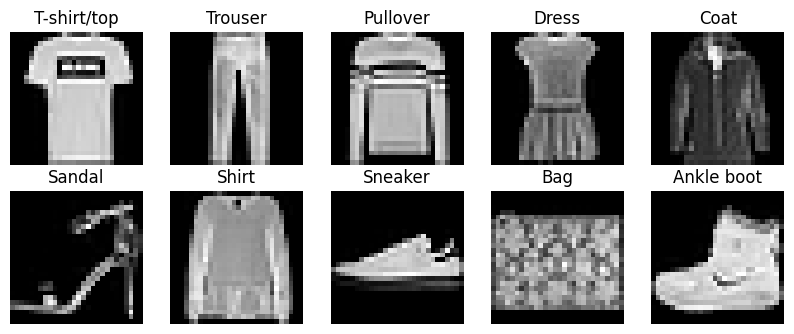

In [29]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Defining the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# code to plot an image from each class
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    plt.subplot(5, 5, i+1)

    # Finding an image with the current label
    idx = np.where(train_labels == i)[0][0]
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.show()


#(b)

#(i) Max epoch = 5

Epoch 1/5
938/938 [==============================] - 62s 64ms/step - loss: 0.5487 - accuracy: 0.8000 - val_loss: 0.3980 - val_accuracy: 0.8549
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.3446 - accuracy: 0.8754 - val_loss: 0.3414 - val_accuracy: 0.8769
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.2962 - accuracy: 0.8909 - val_loss: 0.3088 - val_accuracy: 0.8870
Epoch 4/5
938/938 [==============================] - 56s 60ms/step - loss: 0.2602 - accuracy: 0.9051 - val_loss: 0.2854 - val_accuracy: 0.8943
Epoch 5/5
938/938 [==============================] - 53s 56ms/step - loss: 0.2385 - accuracy: 0.9122 - val_loss: 0.2805 - val_accuracy: 0.8996


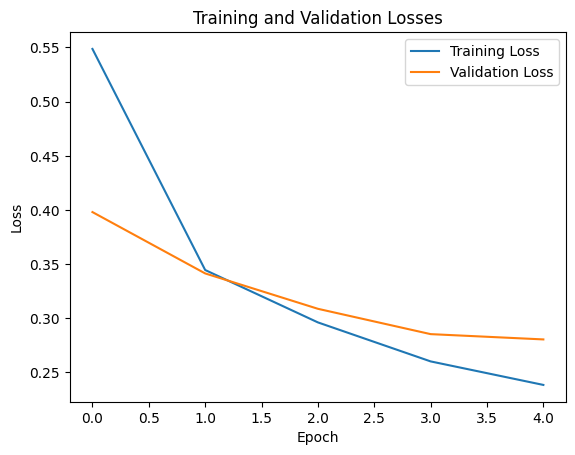

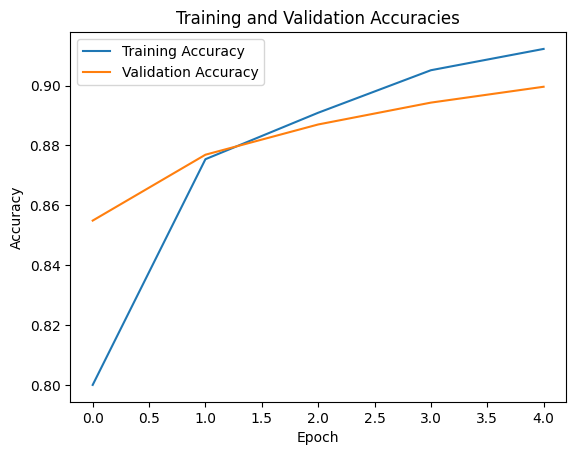

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Loading the Fashion MNIST dataset and preprocessing and normalizing it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plotting the  training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plotting the training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#(ii) Batch size = 64

Epoch 1/5
938/938 [==============================] - 84s 85ms/step - loss: 0.5491 - accuracy: 0.7979 - val_loss: 0.4008 - val_accuracy: 0.8558
Epoch 2/5
938/938 [==============================] - 53s 57ms/step - loss: 0.3442 - accuracy: 0.8752 - val_loss: 0.3381 - val_accuracy: 0.8786
Epoch 3/5
938/938 [==============================] - 64s 68ms/step - loss: 0.2962 - accuracy: 0.8913 - val_loss: 0.3341 - val_accuracy: 0.8790
Epoch 4/5
938/938 [==============================] - 53s 57ms/step - loss: 0.2647 - accuracy: 0.9036 - val_loss: 0.2818 - val_accuracy: 0.8990
Epoch 5/5
938/938 [==============================] - 53s 57ms/step - loss: 0.2419 - accuracy: 0.9099 - val_loss: 0.2799 - val_accuracy: 0.9008


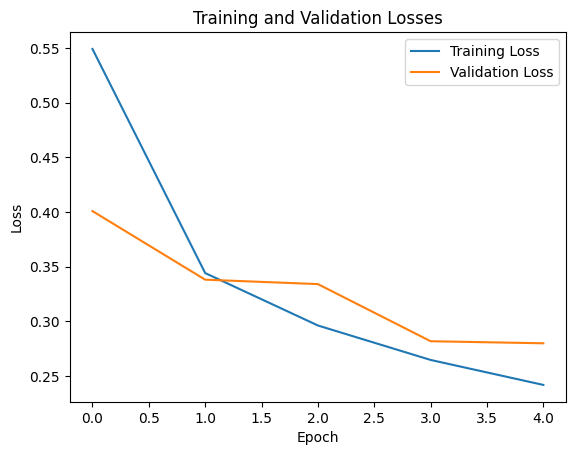

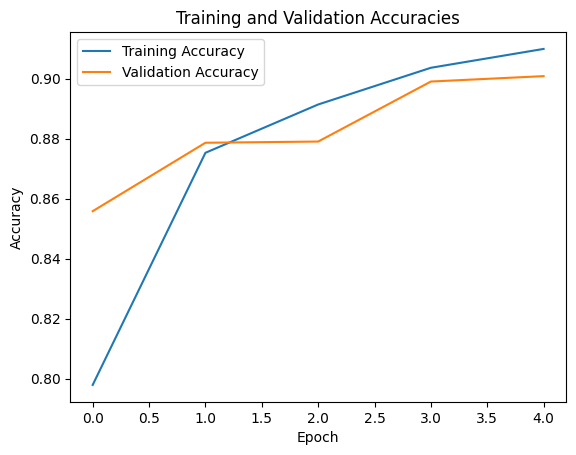

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Loading the Fashion MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch size = 64
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#(iii)  Optimizer = 'adam'

Epoch 1/5
938/938 [==============================] - 54s 56ms/step - loss: 0.5508 - accuracy: 0.7994 - val_loss: 0.4269 - val_accuracy: 0.8452
Epoch 2/5
938/938 [==============================] - 69s 73ms/step - loss: 0.3487 - accuracy: 0.8737 - val_loss: 0.3457 - val_accuracy: 0.8692
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.2965 - accuracy: 0.8924 - val_loss: 0.3083 - val_accuracy: 0.8879
Epoch 4/5
938/938 [==============================] - 58s 61ms/step - loss: 0.2688 - accuracy: 0.9022 - val_loss: 0.2846 - val_accuracy: 0.8963
Epoch 5/5
938/938 [==============================] - 58s 61ms/step - loss: 0.2429 - accuracy: 0.9104 - val_loss: 0.2799 - val_accuracy: 0.8949


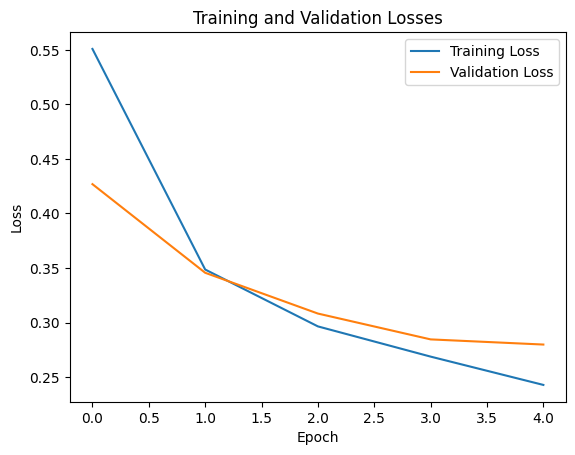

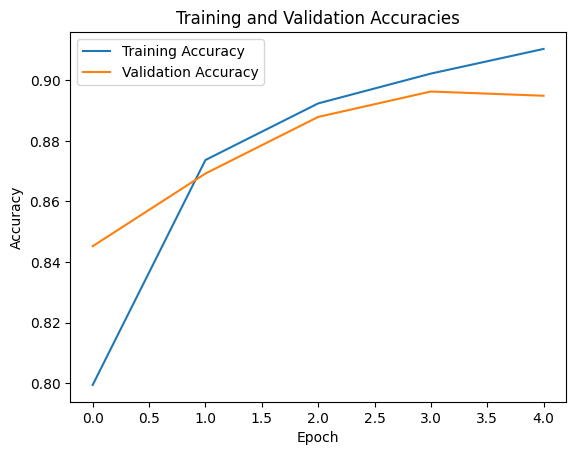

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch size = 64
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#(iv) Only convolutional, max pooling, flattened, and dense layers are used

Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.5509 - accuracy: 0.7976 - val_loss: 0.4257 - val_accuracy: 0.8423
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.3534 - accuracy: 0.8720 - val_loss: 0.3488 - val_accuracy: 0.8763
Epoch 3/5
938/938 [==============================] - 58s 61ms/step - loss: 0.3014 - accuracy: 0.8906 - val_loss: 0.2982 - val_accuracy: 0.8911
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.2687 - accuracy: 0.9021 - val_loss: 0.3038 - val_accuracy: 0.8875
Epoch 5/5
938/938 [==============================] - 57s 61ms/step - loss: 0.2470 - accuracy: 0.9097 - val_loss: 0.2712 - val_accuracy: 0.9018


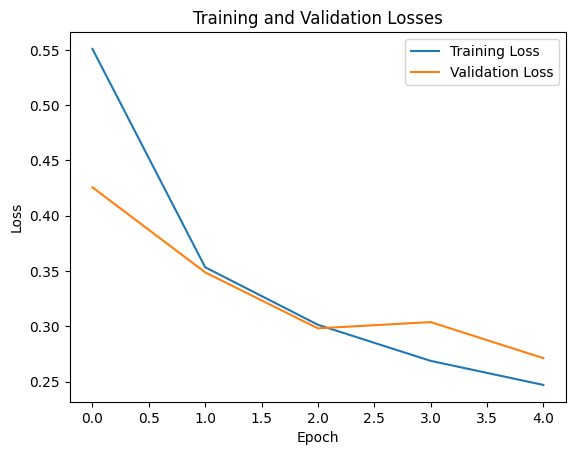

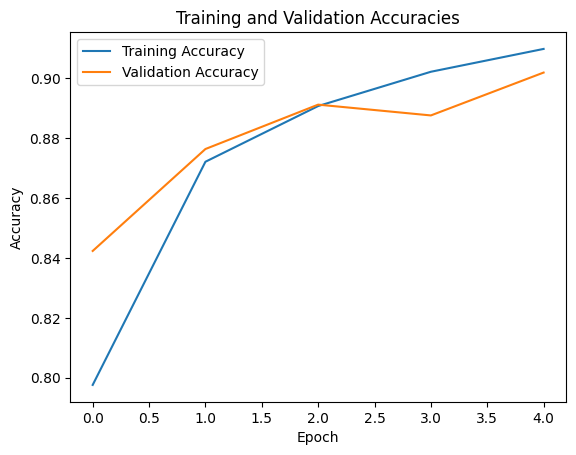

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model with only convolutional, max pooling, flattened, and dense layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch size = 64
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#(v) No batch normalization, regularization, dropout are allowed.

Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 0.5438 - accuracy: 0.8004 - val_loss: 0.4071 - val_accuracy: 0.8539
Epoch 2/5
938/938 [==============================] - 53s 57ms/step - loss: 0.3477 - accuracy: 0.8739 - val_loss: 0.3390 - val_accuracy: 0.8749
Epoch 3/5
938/938 [==============================] - 52s 56ms/step - loss: 0.2964 - accuracy: 0.8910 - val_loss: 0.3257 - val_accuracy: 0.8778
Epoch 4/5
938/938 [==============================] - 60s 64ms/step - loss: 0.2630 - accuracy: 0.9036 - val_loss: 0.2767 - val_accuracy: 0.9003
Epoch 5/5
938/938 [==============================] - 63s 67ms/step - loss: 0.2411 - accuracy: 0.9117 - val_loss: 0.2832 - val_accuracy: 0.8987


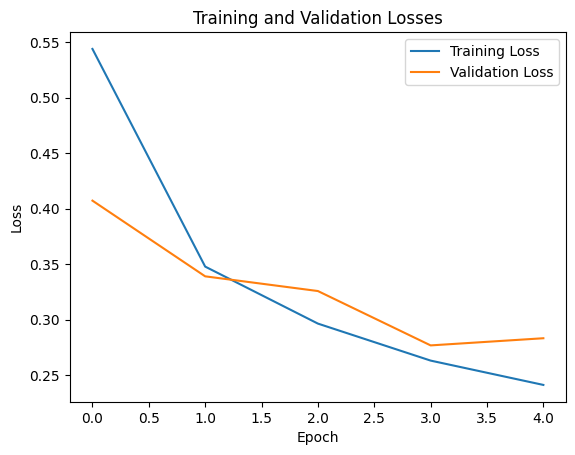

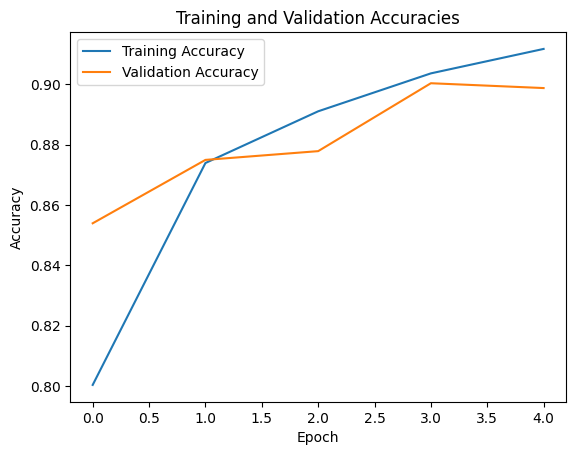

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model with no batch normalization, regularization, dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch size = 64
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#(vi) The penultimate layer of the network contains 128 neurons.

Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 0.5376 - accuracy: 0.8038 - val_loss: 0.3936 - val_accuracy: 0.8617
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.3366 - accuracy: 0.8775 - val_loss: 0.3293 - val_accuracy: 0.8817
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.2872 - accuracy: 0.8950 - val_loss: 0.3026 - val_accuracy: 0.8878
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.2552 - accuracy: 0.9060 - val_loss: 0.2789 - val_accuracy: 0.9010
Epoch 5/5
938/938 [==============================] - 53s 56ms/step - loss: 0.2310 - accuracy: 0.9144 - val_loss: 0.2901 - val_accuracy: 0.8906


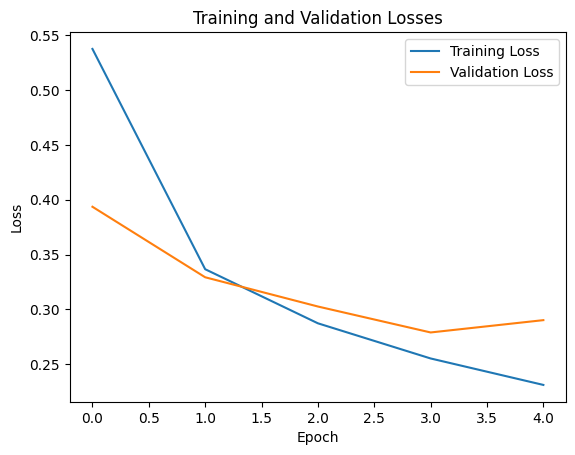

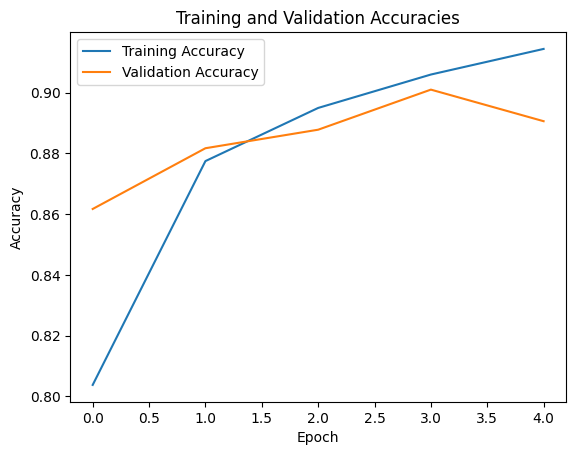

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model with no batch normalization, regularization, dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),  # Penultimate layer with 128 neurons
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch size = 64
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#(vii)  The 'relu' activation function is used, except in the final layer.

Epoch 1/5
938/938 [==============================] - 54s 56ms/step - loss: 0.5324 - accuracy: 0.8054 - val_loss: 0.3846 - val_accuracy: 0.8613
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.3333 - accuracy: 0.8786 - val_loss: 0.3188 - val_accuracy: 0.8857
Epoch 3/5
938/938 [==============================] - 55s 58ms/step - loss: 0.2880 - accuracy: 0.8956 - val_loss: 0.2936 - val_accuracy: 0.8926
Epoch 4/5
938/938 [==============================] - 52s 56ms/step - loss: 0.2573 - accuracy: 0.9049 - val_loss: 0.2761 - val_accuracy: 0.9013
Epoch 5/5
938/938 [==============================] - 52s 55ms/step - loss: 0.2311 - accuracy: 0.9147 - val_loss: 0.2626 - val_accuracy: 0.9060


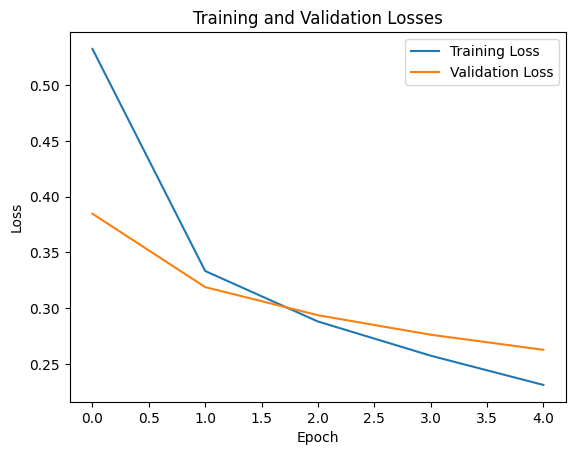

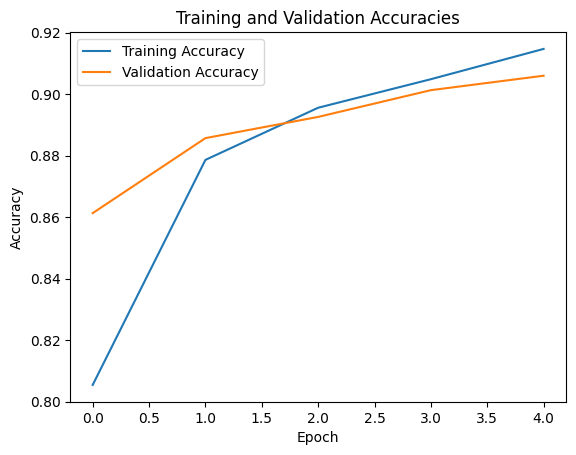

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model with no batch normalization, regularization, dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),  # Penultimate layer with 128 neurons
    Dense(10, activation='softmax') # Final layer with 'softmax' activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch size = 64
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#(viii) The test set is used as validation data

Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 0.5398 - accuracy: 0.8008 - val_loss: 0.4049 - val_accuracy: 0.8541
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.3412 - accuracy: 0.8753 - val_loss: 0.3367 - val_accuracy: 0.8780
Epoch 3/5
938/938 [==============================] - 52s 56ms/step - loss: 0.2917 - accuracy: 0.8926 - val_loss: 0.3069 - val_accuracy: 0.8853
Epoch 4/5
938/938 [==============================] - 52s 56ms/step - loss: 0.2604 - accuracy: 0.9042 - val_loss: 0.2840 - val_accuracy: 0.8949
Epoch 5/5
938/938 [==============================] - 52s 56ms/step - loss: 0.2358 - accuracy: 0.9133 - val_loss: 0.2729 - val_accuracy: 0.9029


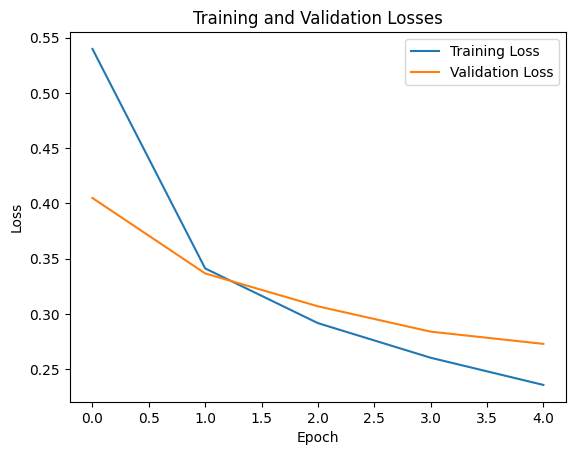

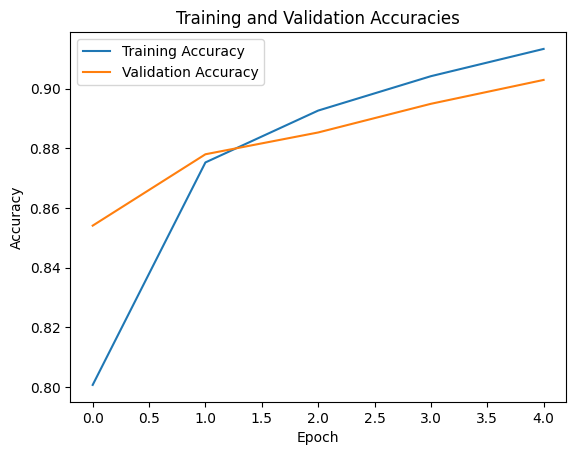

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model with no batch normalization, regularization, dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),  # Penultimate layer with 128 neurons
    Dense(10, activation='softmax') # Final layer with 'softmax' activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with test set as validation data
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


#PROBLEM 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Combine train and test sets
combined_images = np.concatenate((train_images, test_images), axis=0)

# Flatten the images
combined_images_flattened = combined_images.reshape(combined_images.shape[0], -1)

# Normalize the combined dataset
scaler = StandardScaler()
normalized_combined_images = scaler.fit_transform(combined_images_flattened)

# Perform PCA
pca = PCA(n_components=3)
pca.fit(normalized_combined_images)

# Sum of explained variance ratio of the first three principal components
explained_variance_ratio_sum = np.sum(pca.explained_variance_ratio_)

print("Sum of explained variance ratio of the first three principal components:", explained_variance_ratio_sum)


Sum of explained variance ratio of the first three principal components: 0.41958328342702567


##Hence the sum of the explained variance ratio of the first three principal components of the normalized combined dataset is 0.419583

##PROBLEM 3

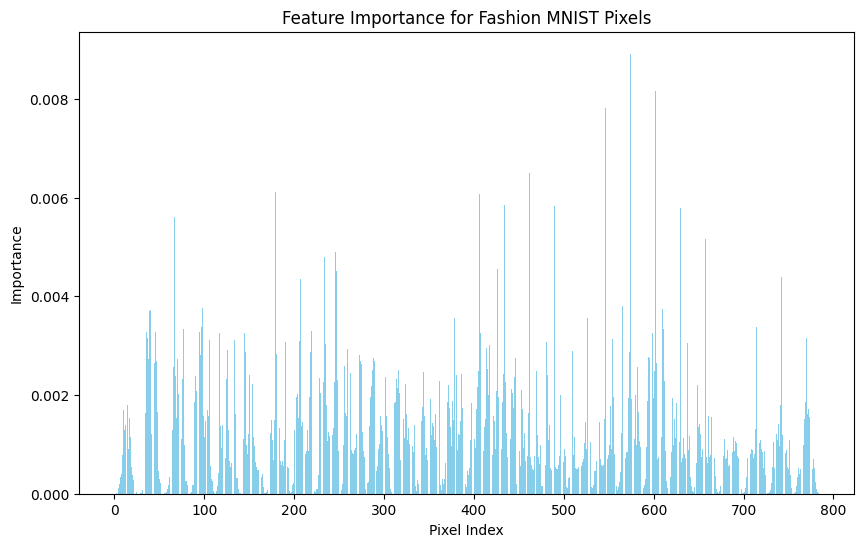

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Combine train and test sets
combined_images = np.concatenate((train_images, test_images), axis=0)
combined_labels = np.concatenate((train_labels, test_labels), axis=0)

# Reshape and normalize the combined dataset
combined_images_flattened = combined_images.reshape(combined_images.shape[0], -1)
scaler = StandardScaler()
normalized_combined_images = scaler.fit_transform(combined_images_flattened)

# Build a random forest classifier with 200 decision trees
random_forest = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest.fit(normalized_combined_images, combined_labels)

# Calculate feature importances
feature_importances = random_forest.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, color='skyblue')
plt.xlabel('Pixel Index')
plt.ylabel('Importance')
plt.title('Feature Importance for Fashion MNIST Pixels')
plt.show()


# Reshape feature importances back to the shape of original images
feature_importances_image = feature_importances.reshape(28, 28)




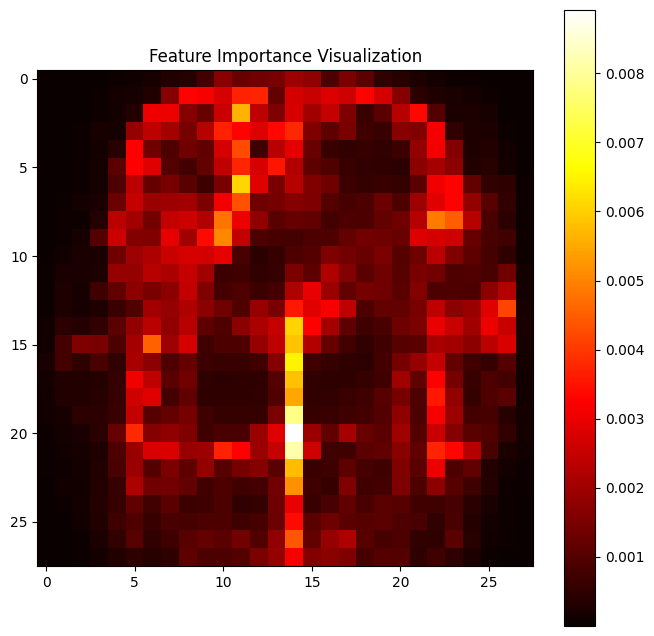

In [56]:
# Plot feature importances as an image
plt.figure(figsize=(8, 8))
plt.imshow(feature_importances_image, cmap='hot')
plt.colorbar()
plt.title('Feature Importance Visualization')
plt.show()

Intentionally left blank

In [57]:
#blank page

blank

In [58]:
#intentionally left blank

blank for printing

In [59]:
#empty

In [60]:
#blank

Nothing here

In [61]:
#endof document

end

In [62]:
#end

Blank page

In [63]:
#end

In [51]:
#End

In [52]:
#end

In [53]:
#end